<a href="https://colab.research.google.com/github/japowell2007/hello-world/blob/master/TrainingNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sears Deep Learning Center AI Traning 
# April 9th, 2019
# Lesson 1

1.   Make a copy of this Notebook.
2.   Let us look at a fictitious store
3. Load the data
4. Explore the data
5. quick view with head()
6. Let us look at column names
7. How many rows do we have ?
8. How many BUs are there ?
9. How many rows do you have for Each BU ?
10. describe basic statistics of the data ?
11. how many unique categoryGroups does the data set have ?
12. What is earliest week we have data for ? what is the latest week we have data for ?
13. which rows have sales greater than 100000 ?
14. Which rows have  qunatity less than 1000 ?
15. Which rows have sales greated then 100000 and qunaity less than 1000 ?


In [0]:
#@title Example form fields
#@markdown Forms support many types of fields.

no_type_checking = ''  #@param
string_type = 'example'  #@param {type: "string"}
slider_value = 114  #@param {type: "slider", min: 100, max: 200}
number = 102  #@param {type: "number"}
date = '2010-11-05'  #@param {type: "date"}
pick_me = "monday"  #@param ['monday', 'tuesday', 'wednesday', 'thursday']
select_or_input = "apples" #@param ["apples", "bananas", "oranges"] {allow-input: true}
#@markdown ---


In [0]:
#@title Example form fields
#@markdown Forms support many types of fields.

no_type_checking = ''  #@param
string_type = 'example'  #@param {type: "string"}
slider_value = 153  #@param {type: "slider", min: 100, max: 200}
number = 102  #@param {type: "number"}
date = '2010-11-05'  #@param {type: "date"}
pick_me = "monday"  #@param ['monday', 'tuesday', 'wednesday', 'thursday']
select_or_input = "apples" #@param ["apples", "bananas", "oranges"] {allow-input: true}
#@markdown ---


# New Section

# New Section

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = 'REPLACE_WITH_YOUR_FILE_ID'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

    100% |████████████████████████████████| 993kB 19.9MB/s 


KeyboardInterrupt: ignored

# New Section

# New Section

# New Section

In [0]:
for i=1
  i=i+1
  print(i)


SyntaxError: ignored

<b>Import Dependencies<b>

In [0]:
# DO NOT TINKER
import os

# numpy for array manimulation and pandas for file loading and data manipulation
import numpy as np
import pandas as pd
import time
import math

# Keras models for neural network creation and learning
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
import keras.backend as K
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout
from sklearn.cluster import KMeans
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MinMaxScaler

# matplotlib for plotting the graphs
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import warnings
from keras.models import load_model
warnings.filterwarnings('ignore')

import locale
locale.setlocale( locale.LC_ALL, '' )
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Using TensorFlow backend.


<b>Read and Preprocess the data<b>

In [0]:
bludf = pd.read_csv('https://raw.githubusercontent.com/brat-shc/Lessons/master/csv_data_dump_fake_store.csv')
df.wk_nbr = df.wk_nbr.astype(str)

In [0]:
#Tinker
df.columns

Index(['wk_nbr', 'bu', 'division', 'category_group', 'total_quantity',
       'total_sales', 'total_margin'],
      dtype='object')

In [0]:
#TINKER
# Show me all the Unique BUs in the dataset 
df['bu'].unique()
# Q: What happens if you do not put the ' '
# Q: Can you show all the Unique divisions 

array(['FOOTWEAR', 'SPORTING GOODS', 'JEWELRY', 'AUTO',
       'GROCERY & HOUSEHOLD', 'ELECTRONICS', 'OUTDOOR LIVING',
       'DRUG STORE', 'HOME', 'APPLIANCES', "APPAREL - MEN'S APPAREL",
       'APPAREL - ACCESSORIES', 'TOYS', 'SUPPORT UNITS',
       'APPAREL - INTIMATE APPAREL', 'PHARMACY', 'SEASONAL',
       'LAWN & GARDEN', 'APPAREL - RTW / WOMENS',
       'APPAREL - CHILDRENS / KIDS', 'OTHER',
       'MATTRESS / HOME BIG TICKET', 'TOOLS & PAINT',
       'APPAREL - OFF-PRICE APPAREL', 'STRATEGIC MERCHANDISING'],
      dtype=object)

In [0]:
# TINKER
# Shows number of Rows in Each 
df['bu'].value_counts()

HOME                           20363
GROCERY & HOUSEHOLD            16137
DRUG STORE                     14036
APPAREL - CHILDRENS / KIDS     10932
APPAREL - MEN'S APPAREL         8277
TOYS                            7879
TOOLS & PAINT                   7095
SPORTING GOODS                  6850
ELECTRONICS                     6674
FOOTWEAR                        6174
AUTO                            5303
APPAREL - RTW / WOMENS          5298
SUPPORT UNITS                   4478
JEWELRY                         4435
APPAREL - INTIMATE APPAREL      4094
APPAREL - ACCESSORIES           2848
LAWN & GARDEN                   1713
APPLIANCES                      1619
OUTDOOR LIVING                  1484
SEASONAL                        1115
STRATEGIC MERCHANDISING          982
PHARMACY                         454
APPAREL - OFF-PRICE APPAREL      431
OTHER                            227
MATTRESS / HOME BIG TICKET        91
Name: bu, dtype: int64

In [0]:
df.describe()

,total_quantity,total_sales,total_margin
count,138989.000,138989.000,138989.000
mean,574.136,3687.993,1485.873
std,2050.460,11231.673,4125.736
min,-18.000,-1199.980,-122799.161
25%,12.000,191.550,91.111
50%,58.000,794.090,396.189
75%,244.000,2712.580,1212.170
max,53796.000,206334.800,94445.144


In [0]:
df['category_group'].nunique()

924

In [0]:
df.wk_nbr.min()

'201444'

In [0]:
df.wk_nbr.max()

'201909'

In [0]:
df[(df.total_sales>=100000)]

,wk_nbr,bu,division,category_group,total_quantity,total_sales,total_margin
31,201527,PHARMACY,PHARMACY,PRESCRIPTION,1725,116431.100,23286.220
109,201833,DRUG STORE,HEALTH CARE,VITAMINS,4972,102789.000,58597.847
350,201844,PHARMACY,PHARMACY,PRESCRIPTION,1924,150638.120,30127.624
466,201731,DRUG STORE,HEALTH CARE,VITAMINS,6026,126783.430,66030.632
688,201638,PHARMACY,PHARMACY,PRESCRIPTION,2154,145127.800,29025.560
733,201635,PHARMACY,PHARMACY,PRESCRIPTION,2046,144942.690,28988.538
1128,201852,DRUG STORE,HEALTH CARE,VITAMINS,5086,108813.130,56799.156
1187,201723,PHARMACY,PHARMACY,PRESCRIPTION,1856,111258.240,22251.648
1228,201714,PHARMACY,PHARMACY,PRESCRIPTION,1653,145678.340,29135.668
1232,201626,PHARMACY,PHARMACY,PRESCRIPTION,1787,116342.050,23268.410


In [0]:
df[(df.total_quantity<=1000)]

,wk_nbr,bu,division,category_group,total_quantity,total_sales,total_margin
0,201851,FOOTWEAR,FOOTWEAR,MENS,81,2017.660,1312.018
1,201725,SPORTING GOODS,SPORT GD ATHLETIC,RACQUET SPORTS,78,428.420,259.741
2,201622,JEWELRY,JEWELRY,COLOR JEWELRY,5,163.050,79.250
3,201824,AUTO,CAR CARE,EQUIPMENT/TOOLS,4,139.960,74.760
5,201552,AUTO,CAR CARE,OIL,199,1864.090,591.489
6,201651,ELECTRONICS,HOME ENTERTAINMENT,PRE-RECORDED MUSIC,2,12.380,5.380
7,201530,OUTDOOR LIVING,OUTDOOR LIVING,BASIC DECOR,10,12.400,-6.703
10,201636,HOME,SOFT HOME,SHOWER CURTAINS,240,3292.070,2045.199
11,201612,ELECTRONICS,HOME ELECTRONICS,DVD HARDWARE,96,4566.300,1487.310
12,201630,FOOTWEAR,FOOTWEAR,WOMENS,61,1397.190,818.070


In [0]:
df[(df.total_sales>=100000) & (df.total_quantity<=1000)]

,wk_nbr,bu,division,category_group,total_quantity,total_sales,total_margin
11521,201743,ELECTRONICS,HOME ELECTRONICS,TUBE TELEVISIONS,670,206334.800,22685.788
16359,201543,ELECTRONICS,HOME ELECTRONICS,TUBE TELEVISIONS,778,195751.430,18114.023
36744,201643,ELECTRONICS,HOME ELECTRONICS,TUBE TELEVISIONS,660,153698.750,23368.880


In [0]:
df[df.category_group=='TUBE TELEVISIONS'].mean()

wk_nbr                 inf
total_quantity      82.211
total_sales      23636.283
total_margin      3757.506
dtype: float64

In [0]:
df_bu = df.groupby(['bu']).sum()
df_bu

,total_quantity,total_sales,total_margin
bu,,,
APPAREL - ACCESSORIES,127290,1504009.450,933300.007
APPAREL - CHILDRENS / KIDS,1437637,16223012.630,8568529.351
APPAREL - INTIMATE APPAREL,605708,5268331.070,2914319.884
APPAREL - MEN'S APPAREL,1247475,16125929.420,7831281.277
APPAREL - OFF-PRICE APPAREL,17885,109191.210,32445.672
APPAREL - RTW / WOMENS,632842,7551411.550,3612560.033
APPLIANCES,139881,6218705.230,1904695.788
AUTO,394341,4581440.800,2164803.479
DRUG STORE,14776567,105858777.990,48980212.805


In [0]:
df_bu.sort_values(['total_sales'],ascending=False)

,total_quantity,total_sales,total_margin
bu,,,
GROCERY & HOUSEHOLD,44876659,174434795.160,52245448.860
DRUG STORE,14776567,105858777.990,48980212.805
HOME,3037622,32493090.450,14057611.141
PHARMACY,440033,31116516.730,6292181.326
SUPPORT UNITS,6202480,29470206.530,19053409.413
TOYS,1607147,19990126.100,9781204.268
APPAREL - CHILDRENS / KIDS,1437637,16223012.630,8568529.351
SPORTING GOODS,833978,16158318.080,6917225.965
APPAREL - MEN'S APPAREL,1247475,16125929.420,7831281.277


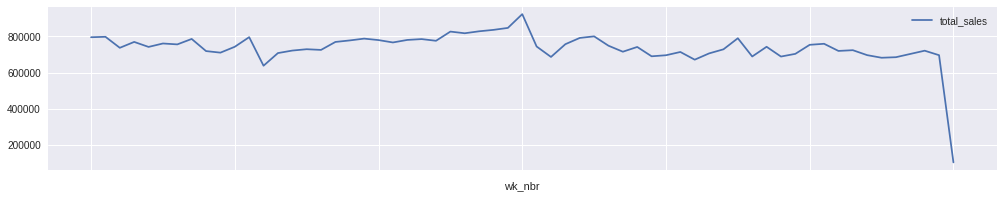

In [0]:
df_1yr = df[(df.wk_nbr>='201801')& (df.bu == 'GROCERY & HOUSEHOLD')]
df_1yr = df_1yr.groupby(['wk_nbr','bu'],as_index=False).sum()
df_1yr = df_1yr.sort_values('wk_nbr').reset_index(drop=True)
df_1yr.plot(x='wk_nbr', y='total_sales',kind='line',figsize=(17,3))

#### Function definitions

In [0]:
# DO NOT TINKER 
def find_where_upper_limit(df,upper_limit,metric="total_sales"):
  res = df[df[metric]<= upper_limit]
  return res

def find_where_lower_limit(df,lower_limit,metric="total_sales"):
  res = df[df[metric]>= lower_limit]
  return res

def find_margin_greater_than(df,value):
  res =df[df["total_margin"] >= value]
  return res

def find_margin_less_than(df,value):
  res =df[df["total_margin"] <= value]
  return res

def find_sales_less_than(df,value):
  res =df[df["total_sales"] <= value]
  return res

def find_sales_greater_than(df,value):
  res =df[df["total_sales"] >= value]
  return res

def find_quantity_greater_than(df,value):
  res =df[df["total_quantity"] >= value]
  return res

def find_quantity_less_than(df,value):
  res =df[df["total_quantity"] <= value]
  return res


In [0]:
#TINKER
find_sales_greater_than(df,100000)

,wk_nbr,bu,division,category_group,total_quantity,total_sales,total_margin
31,201527,PHARMACY,PHARMACY,PRESCRIPTION,1725,116431.100,23286.220
109,201833,DRUG STORE,HEALTH CARE,VITAMINS,4972,102789.000,58597.847
350,201844,PHARMACY,PHARMACY,PRESCRIPTION,1924,150638.120,30127.624
466,201731,DRUG STORE,HEALTH CARE,VITAMINS,6026,126783.430,66030.632
688,201638,PHARMACY,PHARMACY,PRESCRIPTION,2154,145127.800,29025.560
733,201635,PHARMACY,PHARMACY,PRESCRIPTION,2046,144942.690,28988.538
1128,201852,DRUG STORE,HEALTH CARE,VITAMINS,5086,108813.130,56799.156
1187,201723,PHARMACY,PHARMACY,PRESCRIPTION,1856,111258.240,22251.648
1228,201714,PHARMACY,PHARMACY,PRESCRIPTION,1653,145678.340,29135.668
1232,201626,PHARMACY,PHARMACY,PRESCRIPTION,1787,116342.050,23268.410


In [0]:
# TINKER 
# Let us look at our dataset. 
# Q: Can you make df.head() show more rows
df.head()

,wk_nbr,bu,division,category_group,total_quantity,total_sales,total_margin
0,201851,FOOTWEAR,FOOTWEAR,MENS,81,2017.660,1312.018
1,201725,SPORTING GOODS,SPORT GD ATHLETIC,RACQUET SPORTS,78,428.420,259.741
2,201622,JEWELRY,JEWELRY,COLOR JEWELRY,5,163.050,79.250
3,201824,AUTO,CAR CARE,EQUIPMENT/TOOLS,4,139.960,74.760
4,201531,GROCERY & HOUSEHOLD,READERS MARKET,KS - SOUVENIRS,1373,6377.490,3211.068


**Anomaly detection with autoencoders**

In [0]:
#Data Preprocessing 
df = df[df.bu != 'PHARMACY']
df = df[df.bu != 'OTHER']
df = df[df.bu != 'SUPPORT UNITS']

subln_sales = df.groupby(['category_group'], as_index = False)['total_quantity','total_sales','total_margin'].mean()
imp_subln = subln_sales[subln_sales.total_sales >2000]
df = df[df.category_group.isin(imp_subln.category_group.unique())]

df = df[df.division != 'GREETING CARDS']
df = df[df.division != 'HALLOWEEN / THANKSGIVING']
df = df[df.division != 'VALENTINES']
df = df[df.division != 'SOUVENIRS']
df = df[df.division != 'EASTER']
df = df[df.division != 'PARTY SUPPLIES']

In [0]:

model = load_model('https://github.com/bswalia/autoencoder_model/raw/master/anomaly_detector.h5')

predict=model.predict(test_x)

    
#Get RMSE for the reconstruction 
def get_recontruction_error(actual_data, pred_data):

    minus_list= list(np.array(actual_data) - np.array(pred_data))
    square_list= [i ** 2 for i in minus_list]
    mean_square_error= sum(square_list)/(len(square_list))
    rmse= math.sqrt(mean_square_error)
    return rmse


In [0]:
actual=test_x
rmse=get_recontruction_error(actual[0], predict[0])
anomaly = []
for i in range(len(actual)):
    rmse=get_recontruction_error(actual[i], predict[i])
    anomaly.append(rmse)

In [0]:
df_test = pd.read_csv('https://github.com/bswalia/autoencoder_model/raw/master/anomaly_detector_testdata.csv')
df_anomaly=df_test[df_test['RMSE']>=0.28]
df_anomaly=df_anomaly.sort_values(by='RMSE',ascending=False)

df_avgs = df_full[df_full.year == '2018'].groupby(['division','category_group'],as_index = False)['total_quantity','total_sales','total_margin'].mean()
df_avgs.columns = ['division', 'category_group', '2018_avgquantity', '2018_avgsales',
       '2018_avgmargin']
df_anomaly = df_anomaly.merge(df_avgs, how = 'left', on = ['division', 'category_group'])


df_avgs2019 = df_full[df_full.year == '2019'].groupby(['division','category_group'],as_index = False)['total_quantity','total_sales','total_margin'].mean()
df_avgs2019.columns = ['division', 'category_group', '2019_avgquantity', '2019_avgsales',
       '2019_avgmargin']
df_anomaly = df_anomaly.merge(df_avgs2019, how = 'left', on = ['division', 'category_group'])

df_anomaly['deviation_sales'] = df_anomaly['total_sales'] - df_anomaly['2018_avgsales']
df_anomaly['deviation_quantity'] = df_anomaly['total_quantity'] - df_anomaly['2018_avgquantity']
df_anomaly['deviation_margin'] = df_anomaly['total_margin'] - df_anomaly['2018_avgmargin']

df_anomaly['%deviation_sales'] = ((df_anomaly['total_sales'] - df_anomaly['2018_avgsales'])/df_anomaly['2018_avgsales']) * 100
df_anomaly['%deviation_quantity'] = (df_anomaly['total_quantity'] - df_anomaly['2018_avgquantity'])/df_anomaly['2018_avgquantity'] * 100
df_anomaly['%deviation_margin'] = (df_anomaly['total_margin'] - df_anomaly['2018_avgmargin'])/df_anomaly['2018_avgmargin'] * 100
df_anomaly['avg_price_deviation'] = (df_anomaly['total_sales']/df_anomaly['total_quantity']) - (df_anomaly['2018_avgsales']/df_anomaly['2018_avgquantity'])

df_2018 = df_full[df_full.year == '2018']
df_2017 = df_full[df_full.year == '2017']
df_2018['week'] = df_2018['week'].astype('int')
df_2018.columns = ['locn_nbr', 'mth_desc', 'wk_nbr', 'bu', 'div_nm', 'division',
       'category_group', '2018_quantity', '2018_sales', '2018_margin','year', 'week']
df_anomaly = df_anomaly.merge(df_2018[['division', 'category_group','week'
                                      ,'2018_quantity','2018_sales','2018_margin']], how = 'left', on = ['division', 'category_group','week'])
df_anomaly.columns = ['year', 'week', 'dept_desc', 'category_group',
       'quantity', 'sales', 'margin', 'RMSE',
       '2018_avgquantity', '2018_avgsales', '2018_avgmargin',
       '2019_avgquantity', '2019_avgsales', '2019_avgmargin',
       'dev_sales', 'dev_quantity', 'dev_margin',
       '%dev_sales', '%dev_quantity', '%dev_margin',
       'avg_price_deviation', 'lastyear_quantity', 'lastyear_sales', 'lastyear_margin']

columnsT = ['year', 'week', 'dept_desc', 'category_group',
       'quantity','lastyear_quantity','2018_avgquantity', '2019_avgquantity',
        'sales', 'lastyear_sales','2018_avgsales', '2019_avgsales', 
        'margin', 'lastyear_margin','2018_avgmargin', '2019_avgmargin',
       'dev_sales', 'dev_quantity', 'dev_margin',
       '%dev_sales', '%dev_quantity', '%dev_margin','avg_price_deviation','RMSE']
df_anomaly = df_anomaly.reindex(columns=columnsT)

### Prediction using LSTM - RNN


# New Section

# New Section

In [0]:
pos = pd.read_csv('https://raw.githubusercontent.com/brat-shc/Lessons/master/store_data.csv', index_col=False)
# Replace all the NaNs in the data with 0
pos.fillna(0, inplace=True)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_df = scaler.fit_transform(pos)
pos = pd.DataFrame(scaled_df, columns=['wknbr', 's1', 'm1', 'b1', 's2', 'm2', 'b2', 's3', 'm3', 'b3', 's4', 'm4', 'b4', 's5', 'm5', 'b5', 's6', 'm6', 'b6', 's7', 'm7', 'b7', 's8', 'm8', 'b8', 's9', 'm9', 'b9', 's10', 'm10', 'b10', 's11', 'm11', 'b11', 's12', 'm12', 'b12', 's13', 'm13', 'b13', 's14', 'm14', 'b14', 's15', 'm15', 'b15', 's16', 'm16', 'b16', 's17', 'm17', 'b17', 's18', 'm18', 'b18', 's19', 'm19', 'b19', 's20', 'm20', 'b20', 's21', 'm21', 'b21', 's22', 'm22', 'b22', 's23', 'm23', 'b23', 's24', 'm24', 'b24', 's25', 'm25', 'b25', 's26', 'm26', 'b26', 's27', 'm27', 'b27', 's28', 'm28', 'b28', 's29', 'm29', 'b29', 's30', 'm30', 'b30', 's31', 'm31', 'b31', 's32', 'm32', 'b32', 's33', 'm33', 'b33', 's34', 'm34', 'b34', 's35', 'm35', 'b35', 's36', 'm36', 'b36', 's37', 'm37', 'b37', 's38', 'm38', 'b38', 's39', 'm39', 'b39', 's40', 'm40', 'b40', 's41', 'm41', 'b41', 's42', 'm42', 'b42', 's43', 'm43', 'b43', 's44', 'm44', 'b44', 's45', 'm45', 'b45', 's46', 'm46', 'b46', 's47', 'm47', 'b47', 's48', 'm48', 'b48', 's49', 'm49', 'b49', 's50', 'm50', 'b50', 's51', 'm51', 'b51', 's52', 'm52', 'b52', 's53', 'm53', 'b53', 's54', 'm54', 'b54', 's55', 'm55', 'b55'])

In [0]:
from keras.utils.data_utils import get_file
model_path = get_file(
            "storePredictor.h5",
            'https://github.com/brat-shc/Lessons/blob/master/storePredictor.h5?raw=true')
model = load_model(model_path)

548864/541008 [==============================] - 0s 0us/step
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


Week# 0 actual sale: $2,250,463.00 vs predicted sale: $2,347,701.00
Week# 1 actual sale: $2,109,508.00 vs predicted sale: $2,208,714.00
Week# 2 actual sale: $2,114,795.00 vs predicted sale: $2,227,918.00
Week# 3 actual sale: $2,304,778.00 vs predicted sale: $2,194,808.00
Week# 4 actual sale: $2,311,819.00 vs predicted sale: $2,335,109.00
Week# 5 actual sale: $1,923,797.00 vs predicted sale: $2,179,568.00
Week# 6 actual sale: $1,997,126.00 vs predicted sale: $2,174,265.00
Week# 7 actual sale: $2,137,182.00 vs predicted sale: $2,164,992.00
Week# 8 actual sale: $2,440,507.00 vs predicted sale: $2,200,433.00
Week# 9 actual sale: $2,368,746.00 vs predicted sale: $2,260,299.00
Week# 10 actual sale: $2,221,226.00 vs predicted sale: $2,301,086.00
Week# 11 actual sale: $2,257,469.00 vs predicted sale: $2,272,289.00
Week# 12 actual sale: $2,177,696.00 vs predicted sale: $2,266,690.00
Week# 13 actual sale: $2,222,692.00 vs predicted sale: $2,234,461.00
Week# 14 actual sale: $2,255,578.00 vs predi

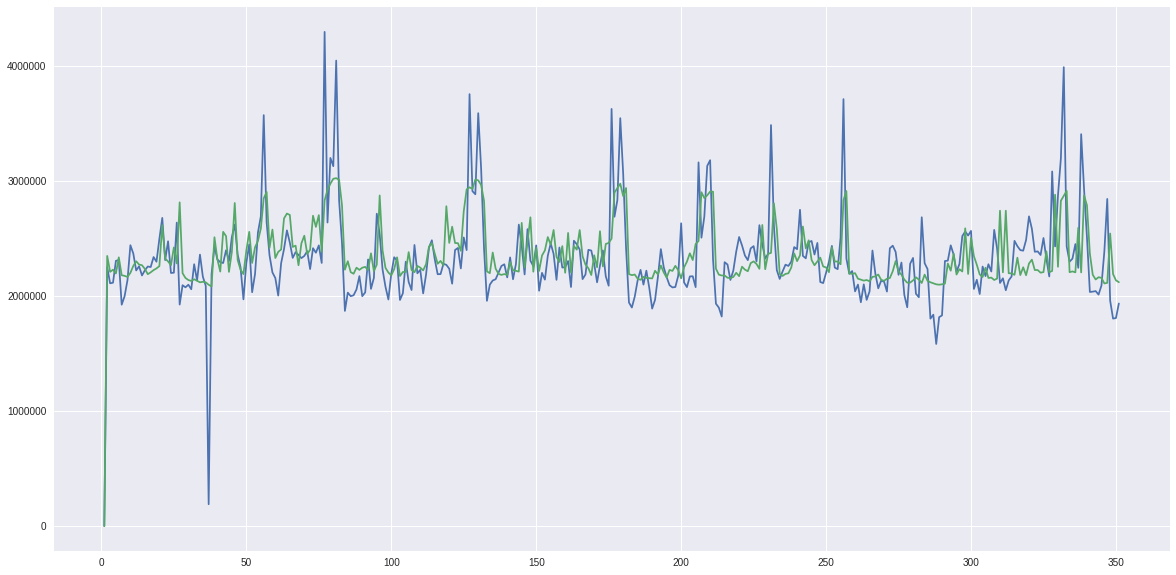

In [0]:
# Load the saved model
pos.reset_index()    
# Initialize arrays for expected and predicted results
y_expec = np.empty((1,1))
y_predi = np.empty((1,1))

# roll the window of length 20 from start to 350th week for predicting
for y in range(0,350,1):
    # take input as 20 data points of 165 length each
    p1 = pos.iloc[y:y+20, 1:166]
    # take output as 21st data point
    p = pos.iloc[y+20:y+21, 1:166]
    p1.reset_index(drop=True, inplace=True)
    p.reset_index(drop=True, inplace=True)
    # define the output as the sum of all the sales in the store across 55 departments in the 21st week
    output = [p['s1'][0]+p['s2'][0]+p['s3'][0]+p['s4'][0]+p['s5'][0]+p['s6'][0]+p['s7'][0]+p['s8'][0]+p['s9'][0]+p['s10'][0]+p['s11'][0]+p['s12'][0]+p['s13'][0]+p['s14'][0]+p['s15'][0]+p['s16'][0]+p['s17'][0]+p['s18'][0]+p['s19'][0]+p['s20'][0]+p['s21'][0]+p['s22'][0]+p['s23'][0]+p['s24'][0]+p['s25'][0]+p['s26'][0]+p['s27'][0]+p['s28'][0]+p['s29'][0]+p['s30'][0]+p['s31'][0]+p['s32'][0]+p['s33'][0]+p['s34'][0]+p['s35'][0]+p['s36'][0]+p['s37'][0]+p['s38'][0]+p['s39'][0]+p['s40'][0]+p['s41'][0]+p['s42'][0]+p['s43'][0]+p['s44'][0]+p['s45'][0]+p['s46'][0]+p['s47'][0]+p['s48'][0]+p['s49'][0]+p['s50'][0]+p['s51'][0]+p['s52'][0]+p['s53'][0]+p['s54'][0]+p['s55'][0]]
    output = np.asarray(output).reshape(1,1)
    
    #reshape input and outputs as required to feed the network
    X_train = np.asarray(p1).reshape(1,20,165)
    y_train = output
    
    # make predictions
    y_pred = model.predict(X_train)
    
    # collect actual and predicted in numpy arrays
    y_expec = np.hstack((y_expec, y_train*152283))
    y_predi = np.hstack((y_predi, y_pred*152283))
    
    print('Week# '+str(y)+' actual sale: '+ locale.currency(round(y_train[0][0]*152283), grouping=True)+' vs predicted sale: '+ locale.currency(round(y_pred[0][0]*152283), grouping=True))
    
    
# plot the predictions
avg_error = round(math.sqrt(mean_squared_error(y_expec, y_predi)))
print('Average Root Mean Squared Error: '+ locale.currency( avg_error, grouping=True))
x_plot = pd.DataFrame(data={'col':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351]})
plt.figure(figsize=(20,10))
plt.plot(x_plot, y_expec[0]) 
fig = plt.plot(x_plot, y_predi[0]) 

In [0]:
df_y_predi = pd.DataFrame(y_predi)

In [0]:
bbdf_y_predi.head()

,0,1,2,3,4,5,6,7,8,9,...,341,342,343,344,345,346,347,348,349,350
0,0.000,2347700.655,2208714.185,2227918.025,2194807.551,2335109.499,2179568.010,2174265.286,2164992.018,2200433.118,...,2183510.525,2142731.121,2162311.973,2157139.664,2108166.039,2113293.472,2542259.493,2189652.524,2135566.569,2119206.736
